Kaggle上下载的，未经过预处理的澳大利亚天气数据集，目标是在这个数据集上预测明天是否会下雨。

Kaggle下载链接：https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# 一、导库导数据，探索特征

## （一）导入需要的库

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #分训练集测试集

## （二）导入数据，探索数据

In [2]:
weather = pd.read_csv('03weatherAUS5000.csv',index_col=0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


特征/标签|含义
:-|:-
Date|观察日期
Location|获取该信息的气象站的名称
MinTemp|以摄氏度为单位的最低温度
MaxTemp|以摄氏度为单位的最高温度
Rainfall|当天记录的降雨量，单位为mm
Evaporation|到早上9点之前的24小时的A级蒸发量（mm）
Sunshine|白日受到日照的完整小时
WindGustDir|在到午夜12点前的24小时中的最强风的风向
WindGustSpeed|在到午夜12点前的24小时中的最强风速（km/h）
WindDir9am|上午9点时的风向
WindDir3pm|下午3点时的风向
WindSpeed9am|上午9点之前每个十分钟的风速的平均值（km/h）
WindSpeed3pm|下午3点之前每个十分钟的风速的平均值（km/h）
Humidity9am|上午9点的湿度（百分比）
Humidity3am|下午3点的湿度（百分比）
Pressure9am|上午9点平均海平面上的大气压（hpa）
Pressure3pm|下午3点平均海平面上的大气压（hpa）
Cloud9am|上午9点的天空被云层遮蔽的程度，这是以“oktas”来衡量的，这个单位记录了云层遮挡天空的程度。0表示完全晴朗的天空，而8表示它完全是阴天。
Cloud3pm|下午3点的天空被云层遮蔽的程度
Temp9am|上午9点的摄氏度温度
Temp3pm|下午3点的摄氏度温度
RainTomorrow|目标变量，标签：明天下雨了吗？

In [3]:
#将特征矩阵和标签Y分开
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

### 1.特征矩阵X

In [4]:
X.shape #5000行是老师随机选的

(5000, 21)

In [5]:
#探索数据类型
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4979 non-null   float64
 3   MaxTemp        4987 non-null   float64
 4   Rainfall       4950 non-null   float64
 5   Evaporation    2841 non-null   float64
 6   Sunshine       2571 non-null   float64
 7   WindGustDir    4669 non-null   object 
 8   WindGustSpeed  4669 non-null   float64
 9   WindDir9am     4651 non-null   object 
 10  WindDir3pm     4887 non-null   object 
 11  WindSpeed9am   4949 non-null   float64
 12  WindSpeed3pm   4919 non-null   float64
 13  Humidity9am    4936 non-null   float64
 14  Humidity3pm    4880 non-null   float64
 15  Pressure9am    4506 non-null   float64
 16  Pressure3pm    4504 non-null   float64
 17  Cloud9am       3111 non-null   float64
 18  Cloud3pm

粗略观察可以发现，这个特征矩阵由一部分分类变量和一部分连续变量组成，其中云层遮蔽程度虽然是以数字表示，但是本质却是分类变量。大多数特征都是采集的自然数据，比如蒸发量、日照时间和湿度等，而少部分特征是人为构成的。还有一些是单纯表示样本信息的变量，比如采集信息的地点以及采集的时间。

In [6]:
#探索缺失值
X.isnull().mean() #缺失值比例

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

到早上9点之前的24小时的A级蒸发量（Evaporation）、白日受到日照的完整小时（Sunshine）、上午9点的天空被云层遮蔽的程度（Cloud9am）和下午3点的天空被云层遮蔽的程度（Cloud3pm）缺失值比例超过30%，最低气温（MinTemp）和最高气温（MaxTemp）等缺失值比例较少，因此需要采取**不同的缺失值填补策略**。

### 2.标签Y

In [7]:
Y.shape

(5000,)

In [8]:
Y.isnull().sum() #标签没有缺失

0

In [9]:
np.unique(Y) #标签是二分类

array(['No', 'Yes'], dtype=object)

# 二、分集，优先探索标签

## （一）分训练集和测试集，并做描述性统计

### 1.分训练集和测试集

在现实中，通常先分训练集和测试集，再进行数据预处理。这是由于测试集在现实中往往是不可获得的，或者被假设为是不可获得的，我们不希望建模的任何过程受到测试集数据的影响，否则就相当于提前告诉模型一部分预测的答案。

In [10]:
#分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420) #随机抽样

In [11]:
Xtrain #索引变乱了

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1809,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
4176,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
110,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3582,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
2162,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,2016-09-08,NorahHead,16.4,23.9,0.0,NaN,NaN,NNE,50.0,N,...,9.0,30.0,77.0,80.0,1029.6,1024.4,NaN,NaN,20.1,20.3
4895,2014-04-04,Wollongong,18.3,21.4,22.6,NaN,NaN,SSW,52.0,SSW,...,15.0,9.0,87.0,89.0,1018.0,1016.7,2.0,8.0,19.6,18.3
4671,2011-11-23,Witchcliffe,12.4,32.2,0.0,NaN,NaN,N,61.0,N,...,37.0,30.0,29.0,25.0,1015.5,1014.7,NaN,NaN,27.4,32.1
4486,2009-01-24,Watsonia,16.1,23.6,0.0,12.8,11.4,W,50.0,WSW,...,20.0,22.0,56.0,37.0,1007.7,1011.2,6.0,2.0,18.0,22.8


In [12]:
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [13]:
Xtrain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2016-09-08,NorahHead,16.4,23.9,0.0,NaN,NaN,NNE,50.0,N,...,9.0,30.0,77.0,80.0,1029.6,1024.4,NaN,NaN,20.1,20.3
3496,2014-04-04,Wollongong,18.3,21.4,22.6,NaN,NaN,SSW,52.0,SSW,...,15.0,9.0,87.0,89.0,1018.0,1016.7,2.0,8.0,19.6,18.3
3497,2011-11-23,Witchcliffe,12.4,32.2,0.0,NaN,NaN,N,61.0,N,...,37.0,30.0,29.0,25.0,1015.5,1014.7,NaN,NaN,27.4,32.1
3498,2009-01-24,Watsonia,16.1,23.6,0.0,12.8,11.4,W,50.0,WSW,...,20.0,22.0,56.0,37.0,1007.7,1011.2,6.0,2.0,18.0,22.8


In [14]:
Ytrain

0        No
1        No
2        No
3       Yes
4        No
       ... 
3495     No
3496    Yes
3497     No
3498     No
3499     No
Name: RainTomorrow, Length: 3500, dtype: object

### 2.探索特征

#### （1）是否存在样本不平衡问题

In [15]:
Ytrain.value_counts()

No     2704
Yes     796
Name: RainTomorrow, dtype: int64

In [16]:
Ytest.value_counts()

No     1157
Yes     343
Name: RainTomorrow, dtype: int64

In [17]:
Ytrain.value_counts()[0]/Ytrain.value_counts()[1] #3.4:1

3.3969849246231156

有轻微的样本不平衡问题。

#### （2）将标签编码

In [18]:
from sklearn.preprocessing import LabelEncoder #标签编码专用，允许一维数据输入
encorder = LabelEncoder().fit(Ytrain) #在训练集训练

In [19]:
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytrain.head()

,0
0,0
1,0
2,0
3,1
4,0


In [20]:
Ytest = pd.DataFrame(encorder.transform(Ytest)) #如果测试集中出现了训练集中没有出现的标签类别，会报错
Ytest.head()

,0
0,0
1,0
2,1
3,0
4,0


至此可将Ytrain和Ytest单独保存到csv文件中，避免后续工作将Ytrain和Ytest覆盖而缺少补救措施。

# 三、探索特征，开始处理特征矩阵

## （一）描述性统计与异常值

In [21]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


通过mean可以看出量纲不统一，通过min看是否可以有负数（没有异常），通过max看是否有异常值（没有异常），降雨量Rainfall严重偏态。

In [22]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


对于去kaggle上下载了数据的小伙伴们，以及坚持要使用完整版数据的（15W行）小伙伴们：<br>
如果你发现了异常值，首先你要观察，这个异常值出现的频率。<br>
如果异常值只出现了一次，多半是输入错误，直接把异常值删除；<br>
如果异常值出现了多次，去跟业务人员沟通，可能这是某种特殊表示，如果是人为造成的错误，异常值留着是没有用的，只要数据量不是太大，都可以删除；<br>
如果异常值占到你总数据量的10%以上了，不能轻易删除。可以考虑把异常值替换成非异常但是非干扰的项，比如说用0来进行替换，或者把异常当缺失值，用均值或者众数来进行替换。

## （二）处理困难特征：日期

In [23]:
#日期是否有重复
Xtrain.iloc[:,0].value_counts()

2014-05-16    6
2015-10-12    6
2015-07-03    6
2016-11-01    5
2011-09-04    5
             ..
2009-02-11    1
2010-11-02    1
2009-08-14    1
2011-06-14    1
2014-03-31    1
Name: Date, Length: 2141, dtype: int64

日期有重复，不是连续型变量。不是日期影响了下雨与否，而是这一天的日照时间、湿度、温度等因素影响了是否会下雨，光看日期并无直接影响。

In [24]:
#以2015-10-12为例
Xtrain.loc[Xtrain.iloc[:,0]=='2015-10-12',:]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
171,2015-10-12,Townsville,19.7,28.4,0.0,12.0,11.4,ENE,43.0,E,...,22.0,30.0,57.0,58.0,1022.0,1017.7,4.0,2.0,25.6,26.1
2163,2015-10-12,PerthAirport,18.1,33.5,0.0,8.2,11.8,ENE,43.0,E,...,4.0,22.0,42.0,26.0,1018.8,1014.7,1.0,1.0,24.7,30.6
2374,2015-10-12,Launceston,10.8,17.3,0.2,NaN,NaN,SSE,52.0,SSE,...,19.0,26.0,75.0,51.0,NaN,NaN,8.0,8.0,12.7,16.2
2891,2015-10-12,Watsonia,10.6,16.7,6.6,3.8,0.2,SSW,37.0,WSW,...,9.0,20.0,100.0,68.0,1018.9,1019.4,7.0,7.0,11.0,14.9
3009,2015-10-12,Cobar,17.0,33.7,1.2,7.2,NaN,N,57.0,N,...,13.0,20.0,36.0,18.0,1016.7,1013.3,1.0,2.0,24.4,32.4
3206,2015-10-12,Williamtown,13.7,33.4,1.6,5.6,9.5,SE,57.0,NNW,...,17.0,31.0,75.0,18.0,1017.8,1012.7,1.0,4.0,20.3,32.9


日期有重复是因为地点不同。

### 1.运用Rainfall创造今天是否下雨（RainToday）这个特征

In [25]:
Xtrain['Rainfall'].isnull().sum()

33

Rainfall有33个缺失值。处理方式：（1）假设没有下雨；（2）今天是否下雨特征也为空值。这里选择（2）。

In [26]:
#训练集
Xtrain.loc[Xtrain.loc[:,'Rainfall'] >= 1,'RainToday'] = 'Yes' #降雨量≥1，下雨
Xtrain.loc[Xtrain.loc[:,'Rainfall'] < 1,'RainToday'] = 'No' #降雨量＜1，不下雨
Xtrain.loc[Xtrain.loc[:,'Rainfall'] == np.nan,'RainToday'] = np.nan #降雨量是缺失值，缺失值
#测试集
Xtest.loc[Xtest.loc[:,'Rainfall'] >= 1,'RainToday'] = 'Yes'
Xtest.loc[Xtest.loc[:,'Rainfall'] < 1,'RainToday'] = 'No'
Xtest.loc[Xtest.loc[:,'Rainfall'] == np.nan,'RainToday'] = np.nan

D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [28]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-01-23,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,2009-03-05,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,2010-03-05,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-26,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,2016-11-28,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


### 2.提取出月份（或季节）作为一个特征使用

In [29]:
Xtrain['Date'] = Xtrain['Date'].apply(lambda x:int(x.split('-')[1])) #对Date的每一行提取日期
Xtrain.head()

<ipython-input-29-15c02376fb6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['Date'] = Xtrain['Date'].apply(lambda x:int(x.split('-')[1])) #对Date的每一行提取日期


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [30]:
Xtrain = Xtrain.rename(columns={'Date':'Month'}) #Date列改成Month
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [31]:
Xtest['Date'] = Xtest['Date'].apply(lambda x:int(x.split('-')[1]))
Xtest = Xtest.rename(columns={'Date':'Month'})
Xtest.head()

<ipython-input-31-b9a2fc6b547f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['Date'] = Xtest['Date'].apply(lambda x:int(x.split('-')[1]))


,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


## （三）处理困难特征：地点

In [32]:
Xtrain.loc[:,'Location'].value_counts().count() #一共49个气象站的名字，超过25个类别的分类型变量会被算法认为是连续型变量

49

### 1.读取每个城市的气候数据

In [33]:
city_climate = pd.read_csv('03Cityclimate.csv')
city_climate.head() #每个城市的气候，来自澳大利亚统计局

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


### 2.读取并处理每个城市的经纬度数据

In [34]:
cityll = pd.read_csv('03cityll.csv',index_col=0)
cityll.head() #每个城市的经纬度，来自澳大利亚统计局

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


#### （1）去掉度数符号

In [35]:
cityll['Latitudenum'] = cityll['Latitude'].apply(lambda x:float(x[:-1]))
cityll['Longitudenum'] = cityll['Longitude'].apply(lambda x:float(x[:-1]))
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir,Latitudenum,Longitudenum
0,Adelaide,34.9285°,138.6007°,"S,",E,34.9285,138.6007
1,Albany,35.0275°,117.8840°,"S,",E,35.0275,117.8840
2,Albury,36.0737°,146.9135°,"S,",E,36.0737,146.9135
3,Wodonga,36.1241°,146.8818°,"S,",E,36.1241,146.8818
4,AliceSprings,23.6980°,133.8807°,"S,",E,23.6980,133.8807


#### （2）是否需要经纬度方向？（不需要）

In [36]:
cityll.loc[:,'Latitudedir'].value_counts() #所有城市都是S，澳大利亚是南半球国家

S,    100
Name: Latitudedir, dtype: int64

In [37]:
cityll.loc[:,'Longitudedir'].value_counts() #所有城市都是E，澳大利亚是东半球国家

E    100
Name: Longitudedir, dtype: int64

In [38]:
citylld = cityll.iloc[:,[0,5,6]]
citylld.head() #只要城市名称和经纬度

,City,Latitudenum,Longitudenum
0,Adelaide,34.9285,138.6007
1,Albany,35.0275,117.8840
2,Albury,36.0737,146.9135
3,Wodonga,36.1241,146.8818
4,AliceSprings,23.6980,133.8807


#### （3）将城市的经纬度和气候合并

In [39]:
#两数据中的城市名称排列相同
citylld.loc[:,'climate'] = city_climate.iloc[:,-1]
citylld.head()

D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,City,Latitudenum,Longitudenum,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


In [40]:
citylld.loc[:,'climate'].value_counts()

Hot dry summer, cool winter          24
Warm temperate                       18
Hot dry summer, warm winter          18
High humidity summer, warm winter    17
Cool temperate                        9
Mild temperate                        9
Warm humid summer, mild winter        5
Name: climate, dtype: int64

### 3.读取并处理训练集中气象站的经纬度

In [41]:
samplecity = pd.read_csv('03samplecity.csv',index_col=0)
samplecity.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Canberra,35.2809°,149.1300°,"S,",E
1,Sydney,33.8688°,151.2093°,"S,",E
2,Perth,31.9505°,115.8605°,"S,",E
3,Darwin,12.4634°,130.8456°,"S,",E
4,Hobart,42.8821°,147.3272°,"S,",E


#### （1）去掉度数符号

In [42]:
samplecity['Latitudenum'] = samplecity['Latitude'].apply(lambda x:float(x[:-1]))
samplecity['Longitudenum'] = samplecity['Longitude'].apply(lambda x:float(x[:-1]))

#### （2）不需要经纬度符号

In [43]:
samplecityd = samplecity.iloc[:,[0,5,6]]
samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


### 4.计算每个气象站到每个城市的距离

在地理上，两个地点之间的距离，公式如下：

$$dist=R×arccos[sin(slat)×sin(elat)+cos(slat)×cos(elat)×cos(slon-elon)]$$

其中R是地球的半径（6371.01km），arccos是三角反余弦函数，slat是起始地点的纬度，slon是起始地点的经度，elat是结束地点的纬度，elon是结束地点的经度，本质还是计算两点之间的距离。而我们爬取的经纬度，本质其实是角度，所以需要用各种三角函数和弧度公式将角度转换成距离。

In [44]:
#首先使用radians将角度转换成弧度
from math import radians, sin, cos, acos
citylld.loc[:,'slat'] = citylld.iloc[:,1].apply(lambda x : radians(x)) #城市纬度
citylld.loc[:,'slon'] = citylld.iloc[:,2].apply(lambda x : radians(x)) #城市经度
samplecityd.loc[:,'elat'] = samplecityd.iloc[:,1].apply(lambda x : radians(x)) #气象站纬度
samplecityd.loc[:,'elon'] = samplecityd.iloc[:,2].apply(lambda x : radians(x)) #气象站经度

D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
citylld.head()

,City,Latitudenum,Longitudenum,climate,slat,slon
0,Adelaide,34.9285,138.6007,Warm temperate,0.609617,2.419039
1,Albany,35.0275,117.8840,Mild temperate,0.611345,2.057464
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter",0.629605,2.564124
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter",0.630484,2.563571
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter",0.413608,2.336659


In [46]:
samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon
0,Canberra,35.2809,149.1300,0.615768,2.602810
1,Sydney,33.8688,151.2093,0.591122,2.639100
2,Perth,31.9505,115.8605,0.557641,2.022147
3,Darwin,12.4634,130.8456,0.217527,2.283687
4,Hobart,42.8821,147.3272,0.748434,2.571345


In [47]:
for i in range(samplecityd.shape[0]): #循环每一行
    slat = citylld.loc[:,'slat'] #城市纬度
    slon = citylld.loc[:,'slon'] #城市经度
    elat = samplecityd.loc[i,'elat'] #气象站纬度
    elon = samplecityd.loc[i,'elon'] #气象站经度
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat)+np.cos(slat)*np.cos(elat)*np.cos(slon.values-elon)) #计算距离
    city_index = np.argsort(dist)[0] #从小到大排序后取第1个值（最近）
    samplecityd.loc[i,'closest_city'] = citylld.loc[city_index,'City']
    samplecityd.loc[i,'climate'] = citylld.loc[city_index,'climate']

D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\22Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\22Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
#查看最后的结果，需要检查城市匹配是否基本正确
samplecityd.head(10)

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate
5,Brisbane,27.4698,153.0251,0.479438,2.670792,Brisbane,"Warm humid summer, mild winter"
6,Adelaide,34.9285,138.6007,0.609617,2.419039,Adelaide,Warm temperate
7,Bendigo,36.7570,144.2794,0.641531,2.518151,Ballarat,Cool temperate
8,Townsville,19.2590,146.8169,0.336133,2.562438,Townsville,"High humidity summer, warm winter"
9,AliceSprings,23.6980,133.8807,0.413608,2.336659,AliceSprings,"Hot dry summer, warm winter"


经验证，Bendigo到Ballarat约1.5h的车程。

In [49]:
#查看气候的分布
samplecityd['climate'].value_counts()

Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

In [50]:
#确认无误后，取出样本气象站所对应的气候
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.columns = ['Location','Climate']
locafinal.head()

,Location,Climate
0,Canberra,Cool temperate
1,Sydney,Warm temperate
2,Perth,Warm temperate
3,Darwin,"High humidity summer, warm winter"
4,Hobart,Cool temperate


In [51]:
#在这里设定气象站Location为索引，是为了之后进行map的匹配
locafinal = locafinal.set_index(keys='Location')
locafinal.head()

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate


### 5.将原数据集中的气象站（Location）替换成气候（Climate）

In [52]:
import re

In [53]:
#map：映射，将Location替换成Climate
#re：正则，将Climate中的逗号和空格都去掉
Xtrain['Location'] = Xtrain['Location'].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(',','',x.strip()))
Xtest['Location'] = Xtest['Location'].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(',','',x.strip()))

In [54]:
Xtrain = Xtrain.rename(columns={'Location':'Climate'})
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Mild temperate,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Hot dry summer cool winter,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [55]:
Xtest = Xtest.rename(columns={'Location':'Climate'})
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,Cool temperate,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,Mild temperate,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,Cool temperate,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Warm temperate,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Mild temperate,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


## （四）处理分类型变量

### 1.填补缺失值

传统地，如果是**分类型特征**，则采用**众数**进行填补。使用**训练集**的众数对**训练集和测试集**进行填补。

#### （1）查看缺失值的缺失情况

In [56]:
#查看缺失值的缺失情况
Xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.009429
Evaporation      0.433429
Sunshine         0.488571
WindGustDir      0.067714
WindGustSpeed    0.067714
WindDir9am       0.067429
WindDir3pm       0.024286
WindSpeed9am     0.009714
WindSpeed3pm     0.018000
Humidity9am      0.011714
Humidity3pm      0.026286
Pressure9am      0.098857
Pressure3pm      0.098857
Cloud9am         0.379714
Cloud3pm         0.401429
Temp9am          0.005429
Temp3pm          0.019714
RainToday        0.009429
dtype: float64

#### （2）找出分类型特征

In [57]:
cate = Xtrain.columns[Xtrain.dtypes == 'object'].tolist()
#除了特征类型为object的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ['Cloud9am','Cloud3pm']
cate = cate + cloud
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

#### （3）用众数填补缺失值（用训练集中的众数同时填补训练集和测试集）

In [58]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
si.fit(Xtrain.loc[:,cate])

SimpleImputer(strategy='most_frequent')

In [59]:
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,7.0,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,7.0,7.0,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,W,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Mild temperate,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Hot dry summer cool winter,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [60]:
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,Cool temperate,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,7.0,7.0,26.2,23.1,Yes
1,3,Mild temperate,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,Cool temperate,9.1,13.3,NaN,NaN,NaN,NE,41.0,N,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,No
3,10,Warm temperate,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,7.0,7.0,16.8,19.6,No
4,11,Mild temperate,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


#### （4）填补后查看缺失情况

In [61]:
Xtrain.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [62]:
Xtest.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

### 2.将分类型变量编码

将训练集中已经存在的类别转换成数字，再使用接口transform分别在测试集和训练集上来编码特征矩阵。当使用接口在测试集上进行编码时，如果测试集上出现了训练集中从未出现过的类别，代码就会报错，此时测试集上或许存在异常值、错误值，或者的确有一个新的类别出现了，而训练数据中并没有这个类别。以此为基础，需要调整模型。

In [63]:
#将所有的分类型变量编码为数字，一个类别是一个数字，先不用OneHotEncoder（特征多，运行缓慢，如果效果不好再尝试OneHotEncoder）
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe = oe.fit(Xtrain.loc[:,cate])

In [64]:
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtrain.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,1.0,2.0,6.0,0.0,0.0,0.0,7.0
1,0.0,6.0,4.0,6.0,0.0,7.0,7.0
2,4.0,13.0,4.0,0.0,0.0,1.0,3.0
3,4.0,8.0,3.0,8.0,0.0,6.0,6.0
4,2.0,5.0,0.0,6.0,0.0,2.0,4.0


In [65]:
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])
Xtest.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,0.0,11.0,8.0,11.0,1.0,7.0,7.0
1,4.0,12.0,12.0,8.0,1.0,8.0,7.0
2,0.0,4.0,3.0,9.0,0.0,7.0,7.0
3,6.0,12.0,13.0,9.0,0.0,7.0,7.0
4,4.0,0.0,12.0,0.0,0.0,8.0,4.0


## （五）处理连续型变量

### 1.填补缺失值

连续型特征使用**均值**填补。使用训练集的众数对训练集和测试集进行填补。

#### （1）找出连续型特征

In [66]:
col = Xtrain.columns.tolist() #全部特征
for i in cate:
    col.remove(i) #挨个移除分类型特征
col #连续型特征

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

#### （2）用均值填补缺失值（用训练集中的均值同时填补训练集和测试集）

In [67]:
impmean = SimpleImputer(missing_values=np.nan,strategy = 'mean')
impmean = impmean.fit(Xtrain.loc[:,col])

In [68]:
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,17.5,36.0,0.0,8.800000,7.508659,2.0,26.000000,6.0,...,15.0,57.0,51.651995,1016.8,1012.2,0.0,7.0,27.5,21.719003,0.0
1,12.0,0.0,9.5,25.0,0.0,5.619163,7.508659,6.0,33.000000,4.0,...,17.0,59.0,31.000000,1020.4,1017.5,7.0,7.0,14.6,23.600000,0.0
2,4.0,4.0,13.0,22.6,0.0,3.800000,10.400000,13.0,39.858413,4.0,...,31.0,79.0,68.000000,1020.3,1015.7,1.0,3.0,17.5,20.800000,0.0
3,11.0,4.0,13.9,29.8,0.0,5.800000,5.100000,8.0,37.000000,3.0,...,28.0,82.0,44.000000,1012.5,1005.9,6.0,6.0,18.5,27.500000,0.0
4,4.0,2.0,6.0,23.5,0.0,2.800000,8.600000,5.0,24.000000,0.0,...,15.0,58.0,35.000000,1019.8,1014.1,2.0,4.0,12.4,22.400000,0.0


In [69]:
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,0.0,22.0,27.8,25.200000,5.619163,7.508659,11.0,57.0,8.0,...,37.00000,91.000000,86.000000,1006.600000,1008.100000,7.0,7.0,26.200000,23.100000,1.0
1,3.0,4.0,12.0,18.6,2.200000,3.000000,7.800000,12.0,52.0,12.0,...,28.00000,88.000000,62.000000,1020.200000,1019.900000,8.0,7.0,14.800000,17.500000,1.0
2,3.0,0.0,9.1,13.3,2.487049,5.619163,7.508659,4.0,41.0,3.0,...,18.55339,69.069095,51.651995,1017.622067,1015.227077,7.0,7.0,16.989859,21.719003,0.0
3,10.0,6.0,13.1,20.3,0.000000,5.619163,7.508659,12.0,33.0,13.0,...,24.00000,40.000000,51.000000,1021.300000,1019.500000,7.0,7.0,16.800000,19.600000,0.0
4,11.0,4.0,12.2,20.0,0.400000,5.619163,7.508659,0.0,33.0,12.0,...,19.00000,92.000000,69.000000,1015.600000,1013.200000,8.0,4.0,13.600000,19.000000,0.0


#### （3）填补后查看缺失情况

In [70]:
Xtrain.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

In [71]:
Xtest.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

### 2.无量纲化

数据的无量纲化是SVM执行前的重要步骤，但注意，这个操作不对分类型变量进行。

#### （1）选择需要无量纲化的特征

In [72]:
col.remove('Month') #移除月份
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

#### （2）无量纲化StandardScaler（均值0，方差1，不改变数据分布）

In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])

In [74]:
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,0.826375,1.774044,-0.314379,0.964367,0.000000,2.0,-1.085893e+00,6.0,...,-0.416443,-0.646283,0.000000,-0.122589,-0.453507,0.0,7.0,1.612270,0.000000,0.0
1,12.0,0.0,-0.427048,0.244031,-0.314379,0.000000,0.000000,6.0,-5.373993e-01,4.0,...,-0.182051,-0.539186,-1.011310,0.414254,0.340522,7.0,7.0,-0.366608,0.270238,0.0
2,4.0,4.0,0.121324,-0.089790,-0.314379,-0.551534,1.062619,13.0,-1.113509e-15,4.0,...,1.458692,0.531786,0.800547,0.399342,0.070852,1.0,3.0,0.078256,-0.132031,0.0
3,11.0,4.0,0.262334,0.911673,-0.314379,0.054826,-0.885225,8.0,-2.239744e-01,3.0,...,1.107105,0.692432,-0.374711,-0.763819,-1.397352,6.0,6.0,0.231658,0.830540,0.0
4,4.0,2.0,-0.975421,0.035393,-0.314379,-0.854715,0.401087,5.0,-1.242605e+00,0.0,...,-0.416443,-0.592734,-0.815433,0.324780,-0.168855,2.0,4.0,-0.704091,0.097837,0.0


In [75]:
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,0.0,1.531425,0.633489,2.871067,0.000000,0.000000,11.0,1.343150,8.0,...,2.161868e+00,1.174369,1.681991,-1.643646,-1.067755,7.0,7.0,1.412848,0.198404,1.0
1,3.0,4.0,-0.035354,-0.646158,-0.036285,-0.794079,0.107073,12.0,0.951369,12.0,...,1.107105e+00,1.013723,0.506733,0.384430,0.700082,8.0,7.0,-0.335927,-0.606132,1.0
2,3.0,0.0,-0.489720,-1.383346,0.000000,0.000000,0.000000,4.0,0.089450,3.0,...,-4.163637e-16,0.000000,0.000000,0.000000,0.000000,7.0,7.0,0.000000,0.000000,0.0
3,10.0,6.0,0.136992,-0.409702,-0.314379,0.000000,0.000000,12.0,-0.537399,13.0,...,6.383207e-01,-1.556609,-0.031928,0.548465,0.640155,7.0,7.0,-0.029125,-0.304431,0.0
4,11.0,4.0,-0.004018,-0.451429,-0.263817,0.000000,0.000000,0.0,-0.537399,12.0,...,5.234093e-02,1.227917,0.849516,-0.301537,-0.303690,8.0,4.0,-0.520009,-0.390632,0.0


# 四、建模与模型评估

## （一）导入需要的模块和库

In [76]:
from time import time #监控模型运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn.metrics import roc_auc_score, recall_score #ROC、AUC、Recall

## （二）建模与模型评估

In [77]:
#ravel把标签处理成一维
Ytrain = Ytrain.iloc[:,0].ravel()
Ytest = Ytest.iloc[:,0].ravel()

In [78]:
for kernel in ['linear','poly','rbf','sigmoid']:
    times = time() #起始时间
    clf = SVC(kernel = kernel #核函数
             ,gamma='auto'
             ,degree = 1
             ,cache_size = 5000 #使用内存
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest) #测试集预测结果
    score = clf.score(Xtest,Ytest) #返回准确度accuracy
    recall = recall_score(Ytest, result) #召回率recall
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) #AUC面积
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f')) #跑一个模型的时间

linear 's testing accuracy 0.844000, recall is 0.469388', auc is 0.869029
00:08:658778
poly 's testing accuracy 0.840667, recall is 0.457726', auc is 0.868157
00:01:223592
rbf 's testing accuracy 0.813333, recall is 0.306122', auc is 0.814873
00:03:956943
sigmoid 's testing accuracy 0.655333, recall is 0.154519', auc is 0.437308
00:01:099086


模型的准确度和auc面积勉勉强强，每个核函数下的recall都不太高。相比之下，**线性**模型的效果是最好的。

# 五、模型调参

可以有不同的目标：<br>
1.希望不计一切代价判断出少数类，得到最高的recall。<br>
2.希望追求最高的预测准确率，一切目的都是为了让accuracy更高，不在意recall或者AUC。<br>
3.希望达到recall、ROC和accuracy之间的平衡，不追求任何一个也不牺牲任何一个。

## （一）追求最高召回率recall

### 1.调class_weight

In [79]:
for kernel in ['linear','poly','rbf','sigmoid']:
    times = time()
    clf = SVC(kernel = kernel
             ,gamma='auto'
             ,degree = 1
             ,cache_size = 5000
             ,class_weight = 'balanced'
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

linear 's testing accuracy 0.796667, recall is 0.775510', auc is 0.870062
00:11:529869
poly 's testing accuracy 0.793333, recall is 0.763848', auc is 0.871448
00:02:311889
rbf 's testing accuracy 0.803333, recall is 0.600583', auc is 0.819713
00:05:930034
sigmoid 's testing accuracy 0.562000, recall is 0.282799', auc is 0.437119
00:04:056830


### 2.使用线性核函数（linear），继续调class_weight以增加少数类的权重

In [80]:
times = time()
clf = SVC(kernel = 'linear'
         ,gamma='auto'
         ,cache_size = 5000
         ,class_weight = {1:10} #注意，这里写的其实是“类别1:10”，隐藏了“类别0:1”这个比例
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

testing accuracy 0.636667, recall is 0.912536', auc is 0.866360
00:20:706569


随着recall上升，精确度下降得十分厉害，不过看起来AUC面积还好，稳定保持在0.86左右。如果此时我们的目的就是追求一个比较高的AUC分数和比较好的recall，那模型此时就算是很不错了。虽然精确度很低，但是精准地捕捉出了每一个雨天。

## （二）追求最高准确率accuracy（意义不大）

### 1.观察样本不均衡状况

In [81]:
valuec = pd.Series(Ytest).value_counts()
valuec

0    1157
1     343
dtype: int64

In [82]:
valuec[0]/valuec.sum() #类别0的比例

0.7713333333333333

### 2.特异度specificity

特异度：所有判断正确的大类样本/所有真正是大类样本的比例

In [83]:
#混淆矩阵
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = 'linear'
         ,gamma='auto'
         ,cache_size = 5000
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 161,  182],
       [  52, 1105]], dtype=int64)

In [84]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.9550561797752809

### 3.调class_weight

#### （1）初步范围

In [85]:
irange = np.linspace(0.01,0.05,10)
for i in irange:
    times = time()
    clf = SVC(kernel = 'linear'
             ,gamma='auto'
             ,cache_size = 5000
             ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" % (1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

under ratio 1:1.010000 testing accuracy 0.844667, recall is 0.475219', auc is 0.869157
00:10:070999
under ratio 1:1.014444 testing accuracy 0.844667, recall is 0.478134', auc is 0.869185
00:10:097775
under ratio 1:1.018889 testing accuracy 0.844667, recall is 0.478134', auc is 0.869198
00:11:002645
under ratio 1:1.023333 testing accuracy 0.845333, recall is 0.481050', auc is 0.869175
00:08:767515
under ratio 1:1.027778 testing accuracy 0.844000, recall is 0.481050', auc is 0.869394
00:08:938937
under ratio 1:1.032222 testing accuracy 0.844000, recall is 0.481050', auc is 0.869528
00:09:995797
under ratio 1:1.036667 testing accuracy 0.844000, recall is 0.481050', auc is 0.869659
00:09:432557
under ratio 1:1.041111 testing accuracy 0.844667, recall is 0.483965', auc is 0.869629
00:09:965759
under ratio 1:1.045556 testing accuracy 0.844667, recall is 0.483965', auc is 0.869712
00:09:102617
under ratio 1:1.050000 testing accuracy 0.845333, recall is 0.486880', auc is 0.869863
00:08:878481


#### （2）更小范围

In [86]:
irange_ = np.linspace(0.018889,0.027778,10) #1.023333为中心
for i in irange_:
    times = time()
    clf = SVC(kernel = 'linear'
             ,gamma='auto'
             ,cache_size = 5000
             ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" % (1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

under ratio 1:1.018889 testing accuracy 0.844667, recall is 0.478134', auc is 0.869225
00:10:220928
under ratio 1:1.019877 testing accuracy 0.844000, recall is 0.478134', auc is 0.869228
00:08:575075
under ratio 1:1.020864 testing accuracy 0.844000, recall is 0.478134', auc is 0.869218
00:11:005332
under ratio 1:1.021852 testing accuracy 0.844667, recall is 0.478134', auc is 0.869188
00:10:455604
under ratio 1:1.022840 testing accuracy 0.844667, recall is 0.478134', auc is 0.869220
00:09:316083
under ratio 1:1.023827 testing accuracy 0.844667, recall is 0.481050', auc is 0.869188
00:10:037313
under ratio 1:1.024815 testing accuracy 0.844667, recall is 0.481050', auc is 0.869231
00:09:340401
under ratio 1:1.025803 testing accuracy 0.844000, recall is 0.481050', auc is 0.869253
00:09:027773
under ratio 1:1.026790 testing accuracy 0.844000, recall is 0.481050', auc is 0.869241
00:10:941829
under ratio 1:1.027778 testing accuracy 0.844000, recall is 0.481050', auc is 0.869326
00:11:596378


模型的效果没有太好，并没有再出现比84.53%精确度更高的取值。可见，模型在不做样本平衡的情况下，准确度已经非常接近极限了，让模型向着少数类的方向调节，不能够达到质变。如果希望再提升准确度，只能选择**更换模型**的方式，调整参数已经不能够帮助我们了。想想看什么模型在线性数据上表现最好呢？

### 4.更换模型：Logistic回归

In [87]:
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver='liblinear').fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

0.8486666666666667

比SVM好一点。

In [88]:
C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver='liblinear',C=C).fit(Xtrain, Ytrain)
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8493333333333334
3.2222222222222223 0.8493333333333334
3.4444444444444446 0.8493333333333334
3.6666666666666665 0.8493333333333334
3.888888888888889 0.8493333333333334
4.111111111111111 0.8493333333333334
4.333333333333333 0.8493333333333334
4.555555555555555 0.8493333333333334
4.777777777777778 0.8493333333333334
5.0 0.8493333333333334


Logistic回归目前最好的结果是84.93%，继续调参可能得到更好的结果。

## （三）追求平衡

### 1.调节线性核函数的C值

#### （1）初步范围

under C 0.010000, testing accuracy is 0.800000,recall is 0.752187', auc is 0.870634
00:01:769253
under C 1.062105, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870009
00:11:775024
under C 2.114211, testing accuracy is 0.794000,recall is 0.772595', auc is 0.870178
00:21:586417
under C 3.166316, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870158
00:31:403501
under C 4.218421, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870153
00:30:798384
under C 5.270526, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870128
00:26:138979
under C 6.322632, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870060
00:26:057090
under C 7.374737, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870029
00:32:943091
under C 8.426842, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870130
00:35:663903
under C 9.478947, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870092
00:41:617134
under C 10.531053, testing acc

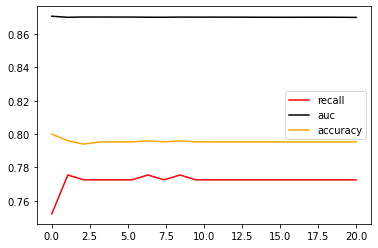

In [89]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = 'linear'
             ,C=C
             ,cache_size = 5000
             ,class_weight = 'balanced'
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))
    
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c='red',label='recall')
plt.plot(C_range,aucall,c='black',label='auc')
plt.plot(C_range,scoreall,c='orange',label='accuracy')
plt.legend()
plt.show()

可以观察到几个现象。<br>
首先，随着C值逐渐增大，模型的运行速度变得越来越慢。对于SVM这个本来运行就不快的模型来说，巨大的C值会是一个比较危险的消耗。所以正常来说，应该设定一个较小的C值范围来进行调整。<br>
其次，C很小的时候，模型的各项指标都很低，但当C到1以上之后，模型的表现开始逐渐稳定，在C逐渐变大之后，模型的效果并没有显著地提高。可以认为设定的C值范围太大了，然而再继续增大或者缩小C值的范围，AUC面积也只能够在0.86上下进行变化了，调节C值不能够让模型的任何指标实现质变。

#### （2）最佳C值

In [90]:
times = time()
clf = SVC(kernel = 'linear'
         ,C=3.1663157894736838
         ,cache_size = 5000
         ,class_weight = 'balanced'
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

testing accuracy 0.795333,recall is 0.772595', auc is 0.870158
00:17:869228


### 2.ROC曲线

#### （1）绘制ROC曲线

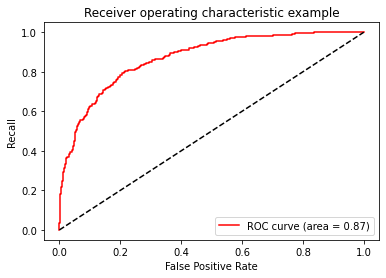

In [91]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt
FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest)) #置信度decision_function
plt.figure()
plt.plot(FPR
        ,Recall
        ,color='red'
        ,label='ROC curve (area = %0.2f)' % area
        )
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

#### （2）求解最佳阈值

In [92]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR)) #Recall-FPR最大值的索引
thresholds[maxindex] #Recall-FPR最大值对应的阈值（最佳阈值）

-0.08963821838192287

#### （3）根据最佳阈值划分类别

In [93]:
clf = SVC(kernel = 'linear'
         ,C=3.1663157894736838
         ,cache_size = 5000
         ,class_weight = 'balanced'
         ).fit(Xtrain, Ytrain)
prob = pd.DataFrame(clf.decision_function(Xtest)) #置信度
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],'y_pred']=1 #置信度≥最佳阈值，类别为1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],'y_pred']=0 #置信度＜最佳阈值，类别为0
prob.loc[:,'y_pred'].isnull().sum() #是否有缺失值

0

In [94]:
prob.head()

,0,y_pred
0,2.189726,1.0
1,0.373274,1.0
2,-0.015771,1.0
3,-1.136413,0.0
4,-0.240865,0.0


#### （4）根据最佳阈值划分类别的效果

In [95]:
from sklearn.metrics import accuracy_score as AC
times = time()
score = AC(Ytest,prob.loc[:,'y_pred'].values)
recall = recall_score(Ytest, prob.loc[:,'y_pred'])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

testing accuracy 0.789333,recall is 0.804665
00:00:003174


还不如不调整时的效果好。可见，如果追求平衡，SVC本身的结果就已经非常接近最优结果了。调节阈值、参数C和class_weight都不一定有效果。但整体来看，我们的模型不是一个糟糕的模型，但这个结果如果提交到kaggle参加比赛是绝对不够的。如果大家感兴趣，还可以更加深入地探索模型，或者换别的方法来处理特征，以达到AUC面积0.9以上，或是准确度或recall都提升到90%以上。